# Stack Overflow Survey Data Analysis
Stack Overflow is the premier online community for developers, offering a platform to learn, share expertise, and advance careers. Every month, over 50 million professional and aspiring programmers visit Stack Overflow to troubleshoot coding issues, enhance skills, and explore job prospects. Collaborating with businesses, Stack Overflow assists in comprehending, hiring, engaging, and empowering developers globally. Their offerings encompass developer marketing, technical recruitment, market research, and enterprise knowledge sharing. Explore their business solutions further for additional insights.

Each year since 2011, Stack Overflow asked the developer community about everything from their favorite technologies to their job preferences. In the year 2020, this survey focused on being more representative of the diversity of programmers worldwide and it was taken by approximately 65,000 people. I will be performing a complete exploratory data analysis on this dataset.



## 1.0 Goals

-Comprehensive exploratory data analysis of the Stack Overflow dataset

-Use visualization tools to bring out insights

## 2.0 Import Libraries 

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## 3.0 Upload and explore datset

In [6]:
df = pd.read_csv('survey_results_public.csv')
pd.set_option('display.max_columns', 1000)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [17]:
df.shape

(65437, 114)

### 3.1 Initial Findings
Many columns with multiple survey responses in individual cells. Remove unnecessary columns and slit data in cells that contain miltiple answers. 

In [20]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [22]:
df.info(verbose =True, show_counts = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    ResponseId                      65437 non-null  int64  
 1    MainBranch                      65437 non-null  object 
 2    Age                             65437 non-null  object 
 3    Employment                      65437 non-null  object 
 4    RemoteWork                      54806 non-null  object 
 5    Check                           65437 non-null  object 
 6    CodingActivities                54466 non-null  object 
 7    EdLevel                         60784 non-null  object 
 8    LearnCode                       60488 non-null  object 
 9    LearnCodeOnline                 49237 non-null  object 
 10   TechDoc                         40897 non-null  object 
 11   YearsCode                       59869 non-null  object 
 12   YearsCodePro    

In [35]:
select_columns = ['MainBranch', 'Age', 'Employment', 'EdLevel', 'DevType', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith',
                  'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith ',
                  'AISearchDevAdmired', 'ConvertedCompYearly', 'JobSat']

In [41]:
df1 = df[['MainBranch', 'Age', 'Employment', 'EdLevel', 'DevType', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith',
                  'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith',
                  'AISearchDevAdmired', 'ConvertedCompYearly', 'JobSat']]
df1.head()

,MainBranch,Age,Employment,EdLevel,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,ConvertedCompYearly,JobSat
0,I am a developer by profession,Under 18 years old,"Employed, full-time",Primary/elementary school,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,35-44 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,45-54 years old,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Developer Experience,United Kingdom of Great Britain and Northern I...,NaN,NaN,C#,C#,C#,Firebase Realtime Database,Firebase Realtime Database,Firebase Realtime Database,Google Cloud,Google Cloud,Google Cloud,NaN,NaN,NaN,NaN,NaN
3,I am learning to code,18-24 years old,"Student, full-time",Some college/university study without earning ...,"Developer, full-stack",Canada,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,MongoDB;MySQL;PostgreSQL;SQLite,MongoDB;MySQL;PostgreSQL,MongoDB;MySQL;PostgreSQL,Amazon Web Services (AWS);Fly.io;Heroku,Amazon Web Services (AWS);Vercel,Amazon Web Services (AWS),NaN,NaN,NaN,NaN,NaN
4,I am a developer by profession,18-24 years old,"Student, full-time","Secondary school (e.g. American high school, G...","Developer, full-stack",Norway,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,C++;HTML/CSS;JavaScript;Lua;Python,PostgreSQL;SQLite,PostgreSQL;SQLite,PostgreSQL;SQLite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MainBranch                 65437 non-null  object 
 1   Age                        65437 non-null  object 
 2   Employment                 65437 non-null  object 
 3   EdLevel                    60784 non-null  object 
 4   DevType                    59445 non-null  object 
 5   Country                    58930 non-null  object 
 6   Currency                   46684 non-null  object 
 7   CompTotal                  33740 non-null  float64
 8   LanguageHaveWorkedWith     59745 non-null  object 
 9   LanguageWantToWorkWith     55752 non-null  object 
 10  LanguageAdmired            50872 non-null  object 
 11  DatabaseHaveWorkedWith     50254 non-null  object 
 12  DatabaseWantToWorkWith     42558 non-null  object 
 13  DatabaseAdmired            38557 non-null  obj

In [45]:
df1.describe()

,CompTotal,ConvertedCompYearly,JobSat
count,3.374000e+04,2.343500e+04,29126.000000
mean,2.963841e+145,8.615529e+04,6.935041
std,5.444117e+147,1.867570e+05,2.088259
min,0.000000e+00,1.000000e+00,0.000000
25%,6.000000e+04,3.271200e+04,6.000000
50%,1.100000e+05,6.500000e+04,7.000000
75%,2.500000e+05,1.079715e+05,8.000000
max,1.000000e+150,1.625660e+07,10.000000


<function matplotlib.pyplot.show(close=None, block=None)>

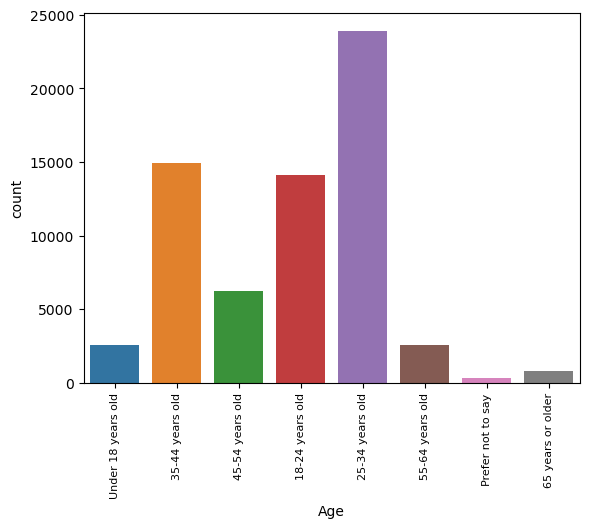

In [74]:
sns.countplot(data = df1, x = 'Age')
plt.xticks(fontsize=8, rotation=90)
plt.show

In [79]:
df1['MainBranch'].head()

0    I am a developer by profession
1    I am a developer by profession
2    I am a developer by profession
3             I am learning to code
4    I am a developer by profession
Name: MainBranch, dtype: object

In [ ]:
def dev_type (x):
    if 'I am a developer by profession' in x:
        x=x.replace('I am a developer by profession', 'Pro Developer')
        

<function matplotlib.pyplot.show(close=None, block=None)>

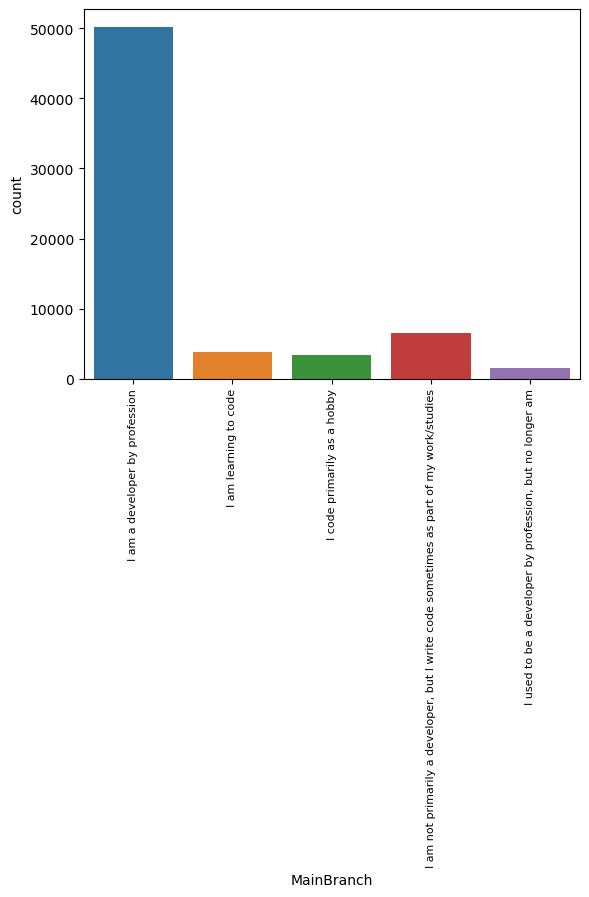

In [76]:
sns.countplot(data = df1, x = 'MainBranch')
plt.xticks(fontsize=8, rotation=90)
plt.show